In [15]:
import data_util

import pandas as pd
import matplotlib.pyplot as plt

If 'data/csv/snp_list.csv' and 'data/csv/30days.csv' exist, then this whole notebook can be ran with run all.

In [16]:
raw_data = pd.read_csv('data/csv/30days.csv')
raw_data

,Unnamed: 0,symbol,date,open,high,low,close,volume
0,0,DECK,09-15-2025,118.720,120.300,117.170,118.66,2453091
1,1,DECK,09-11-2025,114.930,118.260,114.720,117.87,1864807
2,2,DECK,09-10-2025,115.130,116.150,113.533,114.13,1712269
3,3,DECK,09-09-2025,116.500,116.955,114.790,115.41,1888962
4,4,DECK,09-08-2025,119.695,119.902,116.065,117.17,3721165
...,...,...,...,...,...,...,...,...
14995,25,ZBRA,Aug-8-2025,319.030,323.750,316.310,317.66,612500
14996,26,ZBRA,Aug-7-2025,313.050,320.000,308.070,316.01,786100
14997,27,ZBRA,Aug-6-2025,303.010,309.080,299.480,308.31,1127500
14998,28,ZBRA,Aug-5-2025,350.640,350.640,300.750,302.60,2001700


Exploration/visualization for data after trading day 9/15/2025

<Axes: title={'center': 'S&P500 sectors % change'}, ylabel='sector'>

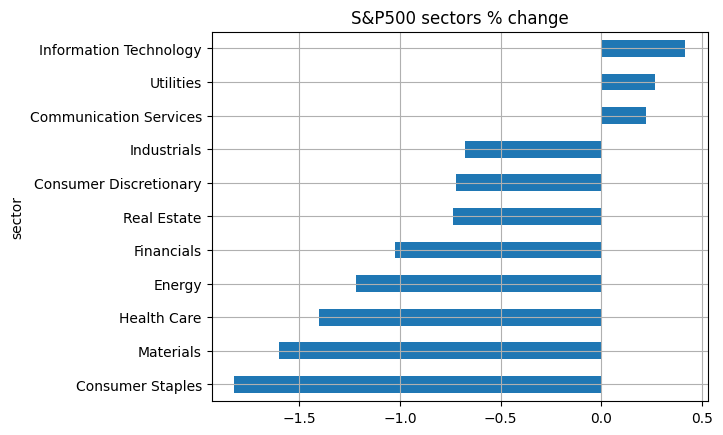

In [17]:
sect = data_util.sectors()
sect_change = sect.groupby('sector').agg({'change':'mean'})
sect_change['change'].sort_values().plot.barh(grid=True, title='S&P500 sectors % change')

In [18]:
filt_sect = sect.filter(['symbol_snp', 'security', 'sector', 'sub_industry', 'close', 'volume', 'change'])
filt_sect.query('sector == "Information Technology"').sort_values('change', ascending=False).round(2)

,symbol_snp,security,sector,sub_industry,close,volume,change
406,STX,Seagate Technology,Information Technology,"Technology Hardware, Storage & Peripherals",108.19,3395500,7.72
487,WDC,Western Digital,Information Technology,"Technology Hardware, Storage & Peripherals",462.60,463500,4.84
42,ANET,Arista Networks,Information Technology,Communications Equipment,156.53,2155000,4.33
247,INTC,Intel,Information Technology,Semiconductors,35.08,6913495,2.87
497,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,442.86,843600,2.64
...,...,...,...,...,...,...,...
411,SWKS,Skyworks Solutions,Information Technology,Semiconductors,105.30,2575000,-2.14
313,MCHP,Microchip Technology,Information Technology,Semiconductors,165.86,789817,-2.36
438,TXN,Texas Instruments,Information Technology,Semiconductors,60.40,2865667,-2.41
189,FICO,Fair Isaac,Information Technology,Application Software,61.78,4856272,-2.59


In [19]:
agg_close = data_util.agg_30_days()
agg_close = agg_close.drop(columns=['dates'])

Stock volatility (standard deviation)

In [20]:
# Top 10 LEAST volatile stocks on the S&P500
agg_close.sort_values('close_std_30days').head(10)

,symbol,close_mean_30days,close_std_30days,close_min_30days,close_max_30days
184,FE,43.496667,0.216800,42.83,43.95
72,CAG,19.167667,0.268388,18.67,19.66
178,F,11.493333,0.276559,10.82,11.91
14,AES,13.094000,0.278104,12.72,13.54
358,PCG,15.124667,0.303846,14.12,15.73
117,CTRA,24.008333,0.379674,23.10,24.74
258,K,79.771333,0.386574,78.94,80.20
241,INVH,30.406333,0.395627,29.65,31.29
464,VICI,33.163667,0.407554,32.20,33.93
377,PPL,36.370667,0.436482,35.65,37.24


In [21]:
# Top 10 MOST volatile stocks on the S&P500
agg_close.sort_values('close_std_30days', ascending=False).head(10)

,symbol,close_mean_30days,close_std_30days,close_min_30days,close_max_30days
342,NVR,8127.939000,218.633808,7760.68,8543.00
48,AZO,4140.844667,105.937645,3967.76,4354.54
60,BKNG,5543.238667,95.979619,5364.25,5720.87
187,FICO,1425.049667,90.602139,1311.26,1596.56
427,TDG,1382.500000,79.177692,1271.04,1608.98
408,SNPS,584.964000,68.060360,387.78,636.02
280,LLY,716.023667,41.006339,625.65,769.00
46,AXON,771.118333,40.768607,725.29,870.97
240,INTU,694.135000,40.448827,646.03,784.87
461,URI,920.894333,38.230180,854.61,975.23


Note that the mean closing prices of the most volatile stocks are much higher than the mean closing prices of the least volatile stocks. Of course higher priced stocks will typically have a higher dollar fluctuation than stocks with lower prices. There is a very low chance that any stock around $20 will have a standard deviation comparable to any on the list of most volatile stocks above. <br>
<br>
Thus, let's even out the playing field, so to speak, and consider the Coefficient of Variation which is the (standard deviation / mean)*100% of each stock.

In [22]:
cv = (agg_close['close_std_30days'] / agg_close['close_mean_30days']) * 100
agg_close['cv'] = cv

In [23]:
# Top 10 least volatile stocks in terms of cv
top10_least_cv = agg_close.sort_values('cv').head(10).round(2)
top10_least_cv

,symbol,close_mean_30days,close_std_30days,close_min_30days,close_max_30days,cv
258,K,79.77,0.39,78.94,80.20,0.48
184,FE,43.50,0.22,42.83,43.95,0.50
492,XEL,72.81,0.63,71.75,74.26,0.86
4,ABT,131.63,1.20,129.28,134.28,0.91
334,NOC,585.14,5.61,571.63,597.21,0.96
171,EVRG,72.11,0.70,70.77,73.27,0.97
472,VTR,68.22,0.66,67.21,69.85,0.97
12,AEE,100.93,0.99,99.20,103.26,0.98
299,MDLZ,62.05,0.63,60.90,63.53,1.01
278,LIN,476.15,4.84,467.40,483.59,1.02


In [24]:
# Top 10 most volatile stocks in terms of cv
top10_most_cv = agg_close.sort_values('cv', ascending=False).head(20).round(2)
top10_most_cv

,symbol,close_mean_30days,close_std_30days,close_min_30days,close_max_30days,cv
448,TTD,56.82,13.08,45.15,89.76,23.01
477,WBD,12.54,2.02,10.78,19.46,16.11
380,PSKY,14.34,2.17,10.12,18.79,15.12
126,DAY,63.48,7.85,49.92,69.77,12.37
408,SNPS,584.96,68.06,387.78,636.02,11.63
458,UNH,294.53,33.98,237.77,353.61,11.54
479,WDC,82.17,8.62,73.78,102.39,10.49
417,STX,168.29,17.49,147.27,211.12,10.39
325,MU,124.38,12.80,107.77,157.77,10.29
259,KDP,31.52,3.16,26.75,35.20,10.02


<Axes: title={'center': 'UNH'}>

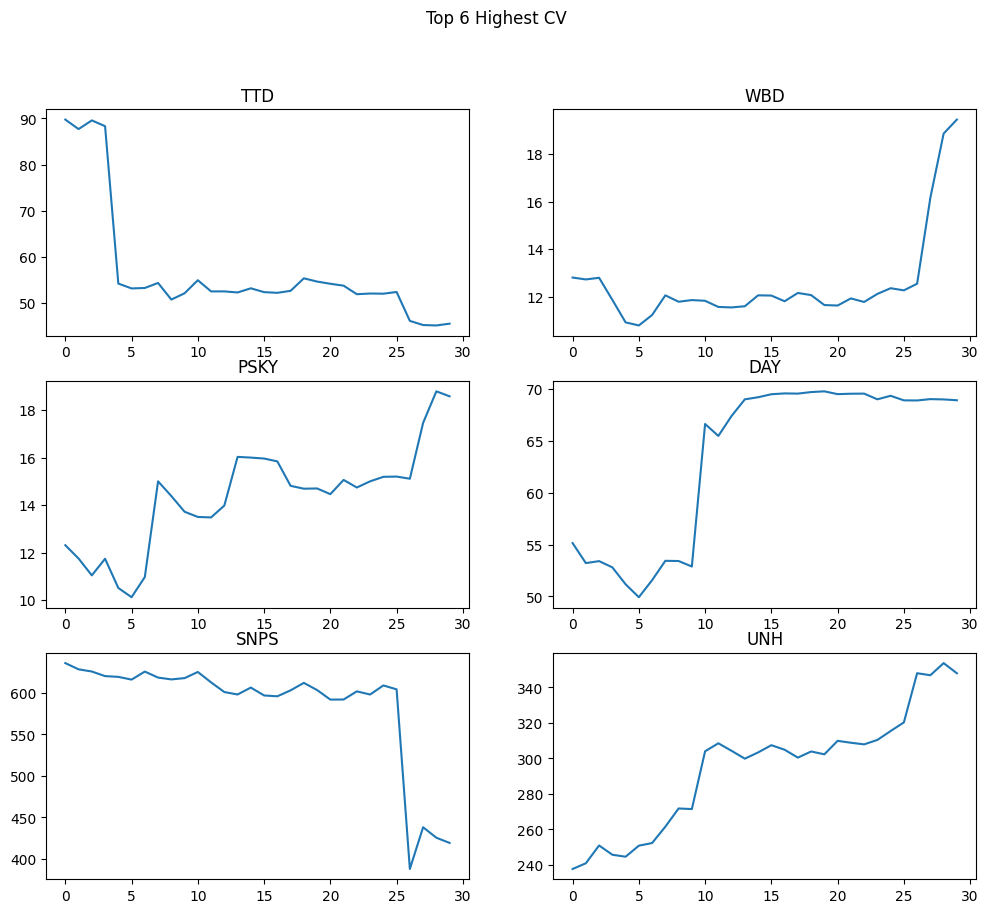

In [25]:
series_list = []

for sym in top10_most_cv['symbol'][:6]:
    series_list.append(raw_data.query('symbol == @sym')[::-1].reset_index().filter(['symbol', 'close']))

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

fig.suptitle('Top 6 Highest CV')
series_list[0]['close'].plot(ax=axes[0][0], title=series_list[0]['symbol'][0])
series_list[1]['close'].plot(ax=axes[0][1], title=series_list[1]['symbol'][0])
series_list[2]['close'].plot(ax=axes[1][0], title=series_list[2]['symbol'][0])
series_list[3]['close'].plot(ax=axes[1][1], title=series_list[3]['symbol'][0])
series_list[4]['close'].plot(ax=axes[2][0], title=series_list[4]['symbol'][0])
series_list[5]['close'].plot(ax=axes[2][1], title=series_list[5]['symbol'][0])

<Axes: title={'center': 'EVRG'}>

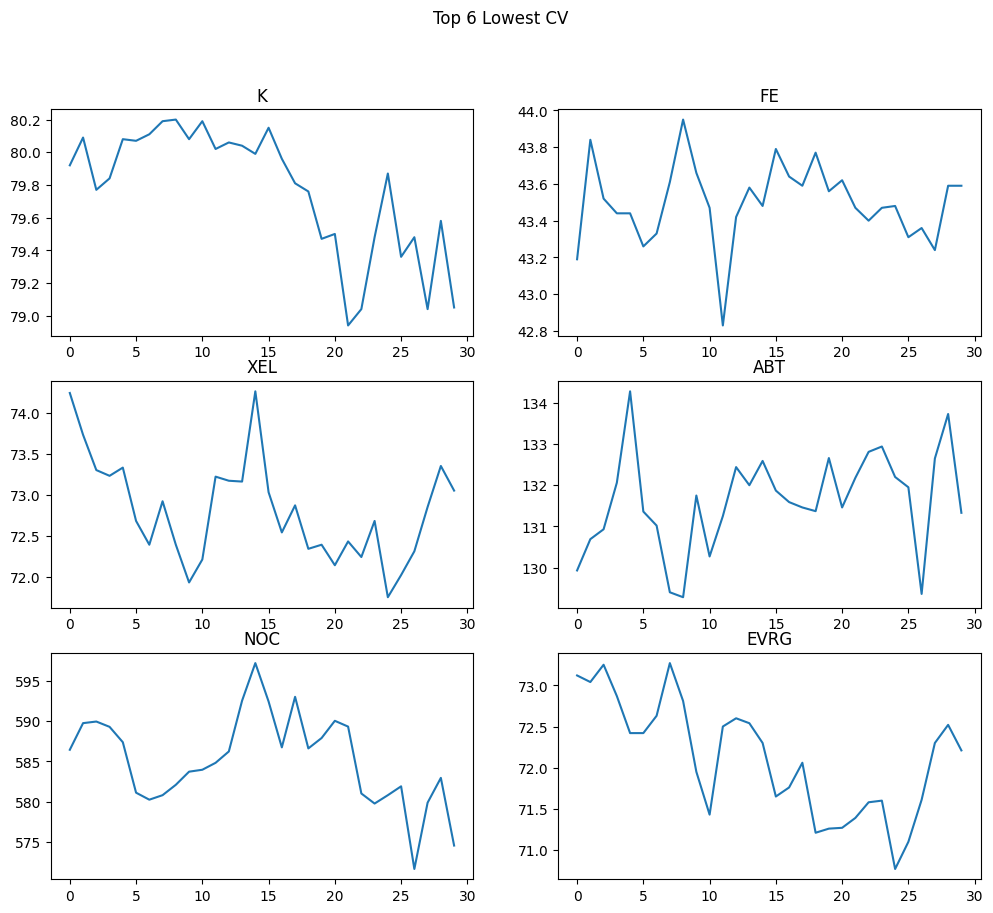

In [26]:
series_list = []

for sym in top10_least_cv['symbol'][:6]:
    series_list.append(raw_data.query('symbol == @sym')[::-1].reset_index().filter(['symbol', 'close']))

fig, axes = plt.subplots(3, 2, figsize=(12, 10))

fig.suptitle('Top 6 Lowest CV')
series_list[0]['close'].plot(ax=axes[0][0], title=series_list[0]['symbol'][0])
series_list[1]['close'].plot(ax=axes[0][1], title=series_list[1]['symbol'][0])
series_list[2]['close'].plot(ax=axes[1][0], title=series_list[2]['symbol'][0])
series_list[3]['close'].plot(ax=axes[1][1], title=series_list[3]['symbol'][0])
series_list[4]['close'].plot(ax=axes[2][0], title=series_list[4]['symbol'][0])
series_list[5]['close'].plot(ax=axes[2][1], title=series_list[5]['symbol'][0])